Mecab について
https://taku910.github.io/mecab/#usage-tools2

In [ ]:
# brew install mecab
# brew install mecab-ipadic
# pip install mecab-python3

In [86]:
#neko.txtをインストール
!wget https://nlp100.github.io/data/neko.txt
 
#形態素解析
!mecab ./neko.txt -o ./neko.txt.mecab

--2023-05-19 18:20:34--  https://nlp100.github.io/data/neko.txt
Resolving nlp100.github.io (nlp100.github.io)... 185.199.110.153, 185.199.111.153, 185.199.109.153, ...
Connecting to nlp100.github.io (nlp100.github.io)|185.199.110.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 975789 (953K) [text/plain]
Saving to: ‘neko.txt.1’

neko.txt.1          100%[===================>] 952.92K  2.66MB/s    in 0.3s    

2023-05-19 18:20:35 (2.66 MB/s) - ‘neko.txt.1’ saved [975789/975789]



In [ ]:
# 30 形態素解析結果の読み込み
""" 
EOS
　	記号,空白,*,*,*,*,　,　,　
吾輩	名詞,代名詞,一般,*,*,*,吾輩,ワガハイ,ワガハイ
は	助詞,係助詞,*,*,*,*,は,ハ,ワ
猫	名詞,一般,*,*,*,*,猫,ネコ,ネコ
で	助動詞,*,*,*,特殊・ダ,連用形,だ,デ,デ
ある	助動詞,*,*,*,五段・ラ行アル,基本形,ある,アル,アル
。	記号,句点,*,*,*,*,。,。,。
"""

result = []
sentence = [] 
 
for lis in open("neko.txt.mecab"):
    l1 = lis.split("\t")
    if len(l1) == 2:
      l2 = l1[1].split(",")
      sentence.append({"surface": l1[0], "base": l2[6], "pos": l2[0], "pos1": l2[1]})
      if l2[1] == "句点":
        result.append(sentence)
        sentence = []
 
result

In [2]:
# 31 動詞 (表層形)
surface_verb = set()

for lis in result:
  for dic in lis:
    if dic["pos"] == "動詞":
      surface_verb.add(dic["surface"])

print(surface_verb)

{'冒し', 'あきらめ', 'すかし', '貰お', '放り出し', '巻き付け', '尖', 'から', '許せ', '下がろ', 'うたっ', '吐き出し', '乗じ', '送っ', '焼い', '覆う', '褪め', 'だい', 'なれ', '食わ', 'だす', 'くぐっ', '焼か', 'はす', '寝転び', '振り向く', '知らせ', '越さ', '浮かば', '取り寄せる', 'あぶら', '断わら', '洗う', '立ち入っ', '寝そべっ', '廃せ', '降りよ', 'かたちづくっ', '冷える', '怒り', 'はずれ', '飲み込め', '入れよ', '論ずる', '疑', '重んずる', '因っ', '奪い合っ', '綴る', '滅入っ', 'あったまり', 'つかれ', 'ほのめい', '詰め', '貰い', '違っ', 'はっ', '這入ら', '飛び下り', 'くらべ', '茂っ', '流れれ', 'しゃがん', 'でき', '使お', '生れれ', '買い込ん', 'かか', '失し', '奮っ', 'えん', '拾う', '騒ぎ立て', 'けりゃ', '近付く', '差し引か', '押し通そ', '持ち切っ', '候え', '引き受ける', 'ぼ', '絞め殺さ', '歩み寄っ', '受取る', 'さがし', '調べ', '窶す', '已めろ', '埋め', '読みかけ', '罹り', '違わ', 'ござら', 'おどかさ', '貫く', '続い', '冷やかす', '繰り返し', '舐める', '引き下がっ', '悔やん', 'いやがれ', '観', '召し上がら', '笑い', '垂れ', '頼み', 'すも', '届け出る', '吹かし', 'とろけ', '開き直っ', '知れ渡っ', '察せ', '見馴れ', '去る', '守る', '嵌め', 'もらお', '勝た', '穿っ', '傾く', '呑ま', '曲がり', 'あずかり', '釣れる', '焚け', '破ら', '読み出す', '分る', '押しつける', '重ねる', '仰向い', '掬い', '潰す', '吐く', 'かなう', '突き立て', '廻る', 'かむ', '離す', 'すり抜け', 'ととのっ', 'つ', '流行り', '見習う', '

In [3]:
# 32 動詞の基本形
base_verb = set()
 
for lis in result:
  for dic in lis:
    if dic["pos"] == "動詞":
      base_verb.add(dic["base"])
 
print(base_verb)

{'存じる', 'ほのめく', '踏切る', '乗せる', '覆う', '吹かす', 'だす', '応じる', '跨ぐ', '振り向く', 'おりる', '取り寄せる', 'おくる', '洗う', '冷える', '論ずる', '重んずる', '漬ける', '爛れる', '綴る', 'ともる', '奏す', '吸い込む', '備わる', 'おいたつ', '蹶る', '占める', '拾う', '近付く', '引き受ける', '受取る', 'いいかえる', 'うめる', '持ちかける', '窶す', '切り抜く', '貫く', '被れる', '冷やかす', '伝う', '舐める', '刻む', '見受ける', '開け放す', '奪い合う', '届け出る', 'そる', '成す', '去る', '捏ねる', '守る', '揃う', '傾く', '手こずる', '釣れる', '押しつける', '読み出す', '分る', '重ねる', '染め出す', 'へぐ', '潰す', '吐く', 'かなう', '食い切る', '廻る', 'かむ', '離す', '差支える', '見習う', '差し込む', '至る', '癒す', '見当る', 'ねじる', '振り落とす', '立ち寄る', 'つかまる', 'かじる', 'あく', '鳴く', 'せしめる', '取り合せる', '嘯く', '眠れる', '盛り込む', '呼ばわる', '近づく', '吟じる', '話す', 'やむをえる', 'だます', 'かい出す', '誘い出す', '見抜く', '吃る', 'ひろげる', 'つまみ出す', 'つづける', 'かせる', '引く', '嚇す', '咲く', 'いそぐ', '満ちる', 'もうす', '噛む', '取り乱す', '惜しむ', 'せる', '張り上げる', '戒める', '引っ掛ける', '申し聞ける', 'まくる', 'すむ', 'あきれる', '叱る', '来たす', '引き取る', 'まう', '埋める', '引越す', '残る', '晴れる', '演じる', '病む', '思い出せる', '潜り込む', 'れる', '得', '散る', 'しまう', '突き立てる', '打ち殺す', '漏る', '見つける', '及ぼす', '瞬く', '欺く', '塗る', '寄

In [6]:
# 33 「AのB」
a_no_b = set()
 
for lis in result:
  for i in range(len(lis)-2):  #range(len(lis)) list index out of range になる可能性がある
   if lis[i]["pos"] == "名詞" and lis[i + 1]["surface"] == "の" and lis[i + 2]["pos"] == "名詞":
     a_no_b.add(lis[i]["surface"] + lis[i + 1]["surface"] + lis[i + 2]["surface"])
 
print(a_no_b)

{'石炭の燃殻', '英国の天子', '自他の区別', '明瞭の智識', '一般の猫', '宝の持ち腐れ', 'ここの前', '限りの事', '天女の鼻', '芝生の上', 'ツユの嵩', '眼の本家', '人間の膝', '相互の見解', '今の世', 'さっきの女', '崎の事', '派の元祖', '陌上の塵', '尻のところ', 'わたしの国', '書斎の掃除', '吾輩の昼寝', '国の国民', '封の中', '隣家の三', '主人の方', '座蒲団の真中', '溜りの中', '心の裏', '新道の二絃琴', '一の字', '妻君の鼻', '多くの経験', '払底の為', '変物の事', '時代のもの', '主義の張本', '個の老人', '男女の心持ち', 'さんの番', '調和の実', '以外の心理', '人の説明', '来訪の主意', '自分の働き', '狂人の名称', '衣装の歴史', '近頃の書生', '流の言葉', '本意の気味', '前の不平', '談話の局面', '下士官の健康', '乾の方角', '金の依頼', '手製の名文', '未来の細君', 'さんの倍', '到来の棒鱈', '君の模写', '鼻の構造', '館の倫理', '他人の姓名', '有為転変の理', '会社の役員', '主人のおやじ', '本質の一部分', '性行の一', 'つんつるてんの乱暴', '例の東風', 'ハイカラの首実検', '岡のよう', '向きの六', '同等の気位', '臭の喩', '善の角', '家の書生', '鋲の頭', '自分の子', '頃の女学生', '自分の胃', '人の哲学', '彼の唱道', '結婚の不可能', '松樹の巓', '多くの分量', '寺内の蓮池', '愛の第一義', '人の女', '机の前', 'うちの旦那', '主客の耳', '左の手', '竈の影', '東の離れ', '以上の学校', '餓鬼大将のため', '人民の生命', '吾輩の写真', '辺のところ', '消極の極', '色の精細', '君の後ろ', '私の手際', '会社の人', '先生のところ', '風呂敷のよう', '有余の出征', '例の山高帽子', '釜の周囲', '色々の方法', '彼の希', '髯の芽生え', '定規の用', '毛の先', '奨励の具', '茶

In [15]:
# 34 名詞の連接
# 名詞の連接（連続して出現する名詞）を最長一致で抽出せよ．
longest_match = []
        
for lis in result:
  noun_conj_list = []
  for dic in lis:
    if dic["pos"] == "名詞":
        noun_conj_list.append(dic['surface'])
    else:
        if len(noun_conj_list) > 1:
            longest_match.append(noun_conj_list)
        noun_conj_list = []

print(longest_match[:10])

[['人間', '中'], ['一番', '獰悪'], ['時', '妙'], ['一', '毛'], ['その後', '猫'], ['一', '度'], ['ぷうぷうと', '煙'], ['邸', '内'], ['三', '毛'], ['書生', '以外']]


In [2]:
# 35 単語の出現頻度
from collections import Counter

voc = []

for lis in result:
  for dic in lis:
    if dic["surface"] != "":
      voc.append(dic["surface"])

voc_freq = Counter(voc)
voc_freq_sort = voc_freq.most_common()
print(voc_freq_sort)

[('の', 9194), ('。', 7486), ('て', 6868), ('、', 6772), ('は', 6420), ('に', 6243), ('を', 6071), ('と', 5508), ('が', 5337), ('た', 3988), ('で', 3806), ('「', 3231), ('」', 3225), ('も', 2479), ('ない', 2390), ('だ', 2363), ('し', 2322), ('から', 2032), ('ある', 1728), ('な', 1613), ('ん', 1568), ('か', 1530), ('いる', 1249), ('事', 1207), ('へ', 1034), ('う', 992), ('する', 992), ('もの', 981), ('君', 973), ('です', 973), ('云う', 937), ('主人', 932), ('よう', 696), ('ね', 683), ('この', 649), ('御', 636), ('ば', 617), ('人', 602), ('その', 576), ('一', 554), ('そう', 546), ('何', 539), ('なる', 531), ('さ', 514), ('よ', 509), ('なら', 483), ('吾輩', 481), ('い', 478), ('ます', 458), ('じゃ', 448), ('…', 433), ('これ', 414), ('\u3000', 411), ('なっ', 404), ('それ', 381), ('来', 364), ('れ', 356), ('見', 350), ('でも', 346), ('時', 345), ('迷亭', 343), ('ませ', 330), ('いい', 320), ('三', 319), ('——', 319), ('まで', 313), ('ところ', 313), ('方', 312), ('二', 303), ('ず', 299), ('上', 294), ('まし', 289), ('寒月', 286), ('顔', 282), ('ぬ', 277), ('先生', 274), ('見る', 273), ('人間', 272),

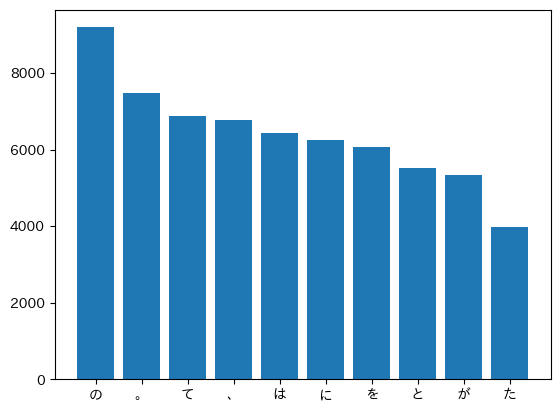

In [9]:
# 36 頻度上位10語
import matplotlib.pyplot as plt
import japanize_matplotlib

#count
word, count = zip(*voc_freq_sort[:10])

#plot
fig, ax = plt.subplots()
ax.bar(word, count)

plt.show()

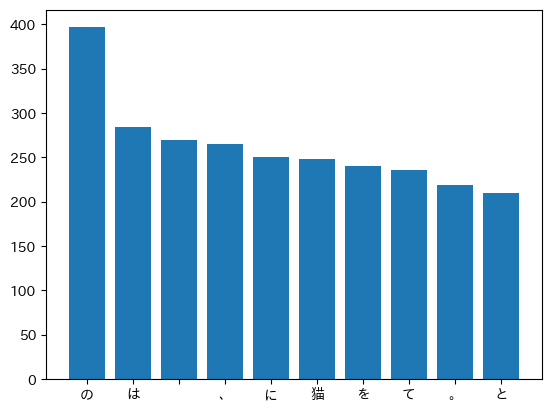

In [10]:
#37 「猫」と共起頻度の高い上位10語
neko_cooccur = []

for lis in result:
  if any(dic["base"] == "猫" for dic in lis):
    for dic in lis:
      neko_cooccur.append(dic["surface"])

#count
count_neko_cooccur = Counter(neko_cooccur)
word, count = zip(*count_neko_cooccur.most_common(10))

#plot
fig, ax = plt.subplots()
ax.bar(word, count)
plt.show()

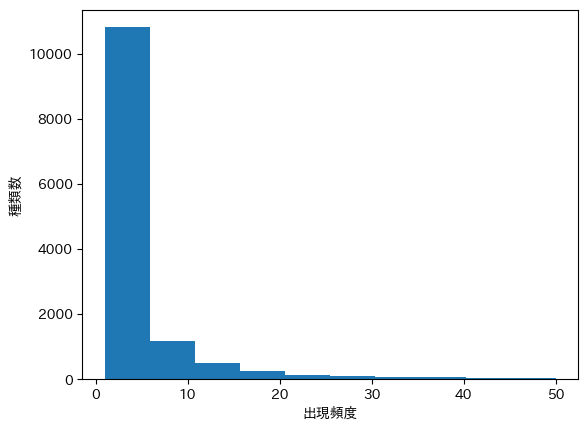

In [26]:
# 38 ヒストグラム
# 横軸は出現頻度(1から単語の出現頻度の最大値まで)
# 縦軸はx軸で示される出現頻度となった単語の異なり数(種類数）

#plot
fig, ax = plt.subplots()
ax.hist(voc_freq.values(), range=(min(voc_freq.values()),50))``
plt.xlabel("出現頻度")
plt.ylabel("種類数")
plt.show()

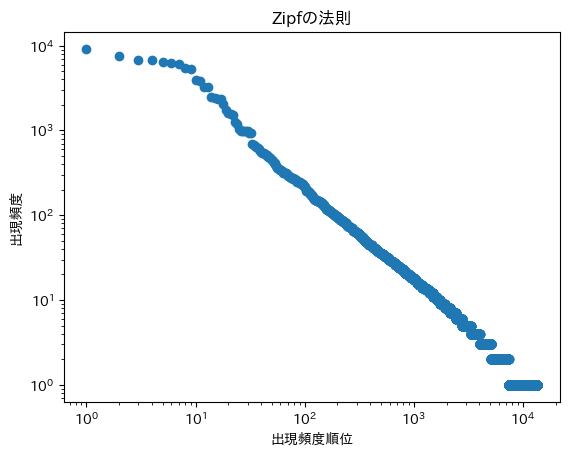

In [97]:
# 39 Zipfの法則
# 単語の出現頻度順位を横軸，その出現頻度を縦軸として，両対数グラフをプロットせよ．
word, count = zip(*voc_freq_sort)

#plot
x = ([i + 1 for i in range(len(count))]) # i:index　順位
y = count
fig, ax = plt.subplots()
ax.scatter(x, y)
plt.xscale("log")
plt.yscale("log")
ax.set_title('Zipfの法則')
ax.set_xlabel('出現頻度順位')
ax.set_ylabel('出現頻度')
plt.show()